## ***Environmental preparation***

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## ***Dataset preparation***

In [2]:
# Importing a dataset and creating a DataFrame
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")
df_init = data.copy()

## ***EDA***

In [3]:
# Display the first few rows of the 'df_init' DataFrame
df_init.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# Generate summary statistics (mean, min, max, etc.) for each numerical column in 'df_init'
# and transpose the result for better readability
df_init.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [5]:
# Display the size of the DataFrame
df_init.shape

(11914, 16)

In [6]:
# Display DataFrame Information
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
# Display List of numerical columns
list(df_init.select_dtypes(include=['int64', 'float64']).columns)

['Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

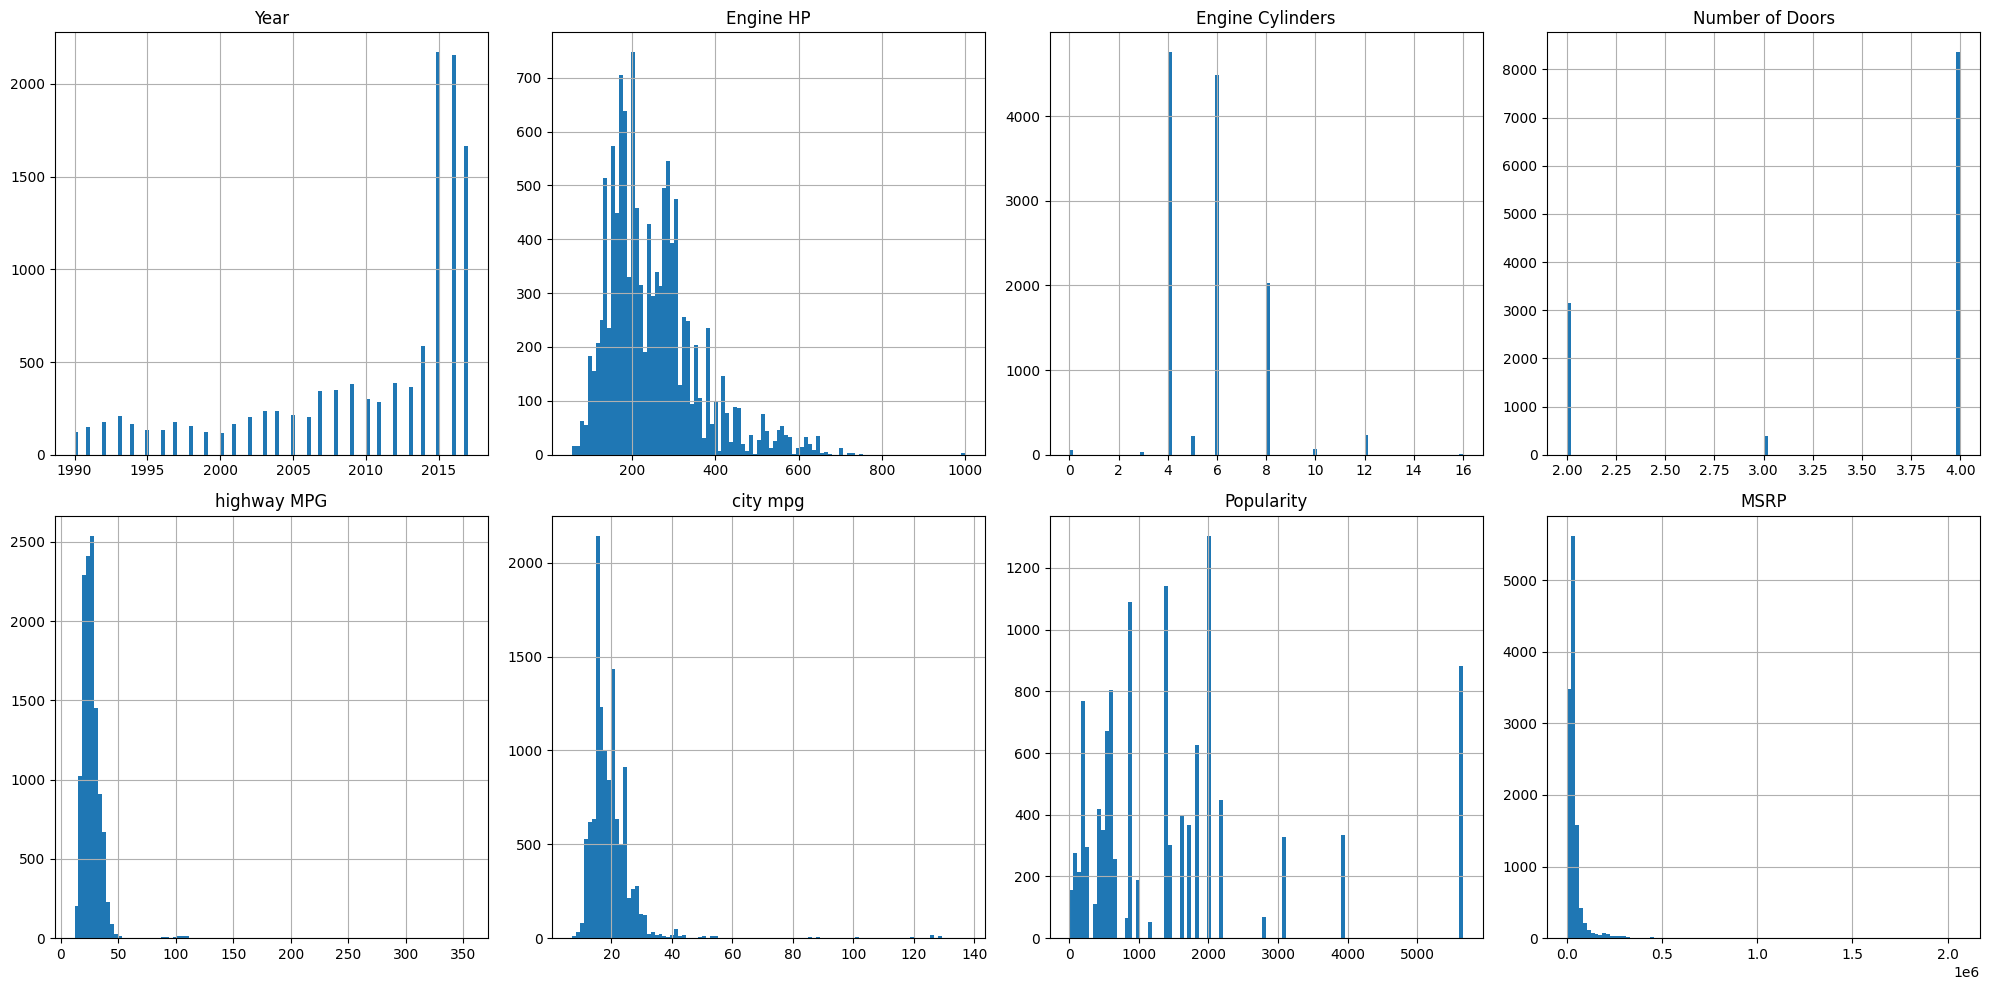

In [8]:
# Create histograms for multiple columns

columns_to_plot = ['Year',
                   'Engine HP',
                   'Engine Cylinders',
                   'Number of Doors',
                   'highway MPG',
                   'city mpg',
                   'Popularity',
                   'MSRP',
                   ]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.ravel()

for i, column in enumerate(columns_to_plot):
    df_init[column].hist(bins=100, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

## ***Preparing the dataset***

In [9]:
# Display List of columns
list(df_init.dtypes.index)

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [10]:
# Creating a new DataFrame with selected columns
df = df_init[
    [
        'Make',
        'Model',
        'Year',
        'Engine HP',
        'Engine Cylinders',
        'Transmission Type',
        'Vehicle Style',
        'highway MPG',
        'city mpg',
    ]
]

In [11]:
# Converting string columns to lowercase and replacing spaces with underscores
df.columns = df.columns.str.replace(' ', '_').str.lower()
string_columns = list(df.dtypes[df.dtypes == "object"].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [12]:
# Display List of columns in new DafaFrame
list(df.dtypes.index)

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

In [13]:
# Renaming the 'MSRP' column in the 'df_init' DataFrame to 'price'
df_init.rename(columns={'MSRP':'price'}, inplace=True)

In [14]:
# Checking for missing values
display(df.isnull().sum())
print()
# filling them with 0
df = df.fillna(0)
# Checking after filling them with 0
display(df.isnull().sum())

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
dtype: int64

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
dtype: int64

## ***Question 1***

In [15]:
# Counting unique values in the 'transmission_type' column
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [16]:
# Using the mode() method to find the mode
df_q1 = df['transmission_type'].mode()[0]

# Printing the answer to a question
print(f"\nAnswer to question 1:")
print(f'The Most frequent value for `transmission_type` is {df_q1}')


Answer to question 1:
The Most frequent value for `transmission_type` is automatic


## ***Question 2***

highway_mpg         0.886829
city_mpg            0.886829
engine_hp           0.774851
engine_cylinders    0.774851
dtype: float64


Answer to question 2:
The highest correlation between features is 0.8868 between highway_mpg and city_mpg



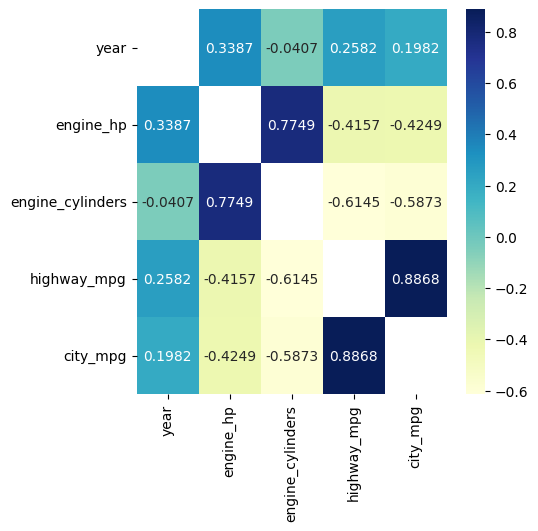

In [17]:
# Calculating the correlation matrix and finding the highest correlation
corr_matrix_df = df.corr()[df.corr() != 1]
max_corr = corr_matrix_df.max().max()
row, col = (corr_matrix_df == max_corr).stack().idxmax()

# Displaying the top 4 highest correlations
display(corr_matrix_df.max().sort_values(ascending=False).head(4))

# Creating a heatmap to visualize correlations
fig = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(corr_matrix_df, annot=True, fmt=".4f", cmap="YlGnBu")

# Printing the answer to a question
print(f"\nAnswer to question 2:")
print(f'The highest correlation between features is {max_corr:.4f} between {row} and {col}')
print(f'')


In [18]:
# Calculating the mean price
mean_price = df_init['price'].mean()

# Creating a binary 'above_average' column based on a condition
df['above_average'] = (df_init['price'] > mean_price).astype(int)

In [19]:
# Splitting the data into train, validation, and test sets
# Importing library
from sklearn.model_selection import train_test_split

In [20]:
# Splitting the DataFrame 'df' into three subsets: training, validation, and testing.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# Displaying the sizes of different data sets
n = len(df)
n_full_train = len(df_full_train)
n_train = len(df_train)
n_val = len(df_val)
n_test = len(df_test)

print(f"n_dataset = \t\t{n}")
print(f"n_full_train = \t\t{n_full_train}")
print(f"n_train = \t\t{n_train}")
print(f"n_val = \t\t{n_val}")
print(f"n_test = \t\t{n_test}")
print(f"check of sum:\n(train + val + test) = \t{n_train + n_val + n_test}")

n_dataset = 		11914
n_full_train = 		9531
n_train = 		7148
n_val = 		2383
n_test = 		2383
check of sum:
(train + val + test) = 	11914


In [21]:
# Display the first two rows of the training set 'df_train' after resetting the index.
display(df_train.reset_index(drop=True).head(2))
# Display the first two rows of the validation set 'df_val' after resetting the index.
display(df_val.reset_index(drop=True).head(2))
# Display the first two rows of the test set 'df_test' after resetting the index.
display(df_test.reset_index(drop=True).head(2))

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,mitsubishi,endeavor,2011,225.0,6.0,automatic,4dr_suv,19,15,0
1,kia,borrego,2009,276.0,6.0,automatic,4dr_suv,21,17,0


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,volkswagen,beetle,2015,210.0,4.0,manual,2dr_hatchback,31,23,0
1,audi,sq5,2015,354.0,6.0,automatic,4dr_suv,24,17,1


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,gmc,envoy_xl,2005,275.0,6.0,automatic,4dr_suv,18,13,0
1,volkswagen,passat,2016,170.0,4.0,automatic,sedan,38,25,0


In [22]:
# Creating target variables for the training, validation, and test datasets.
# These variables represent the 'above_average' column values from their respective datasets.
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

## ***Question 3***

In [23]:
# Calculating the mutual information score for categorical variables
# Importing library
from sklearn.metrics import mutual_info_score

In [24]:
# Creating a list of column names ('cat') where the data type is 'object'
cat = list(df.dtypes[df.dtypes == 'object'].index)
cat

['make', 'model', 'transmission_type', 'vehicle_style']

In [25]:
# Calculate MI (Mutual Information) for each categorical column in the 'df_train' dataset.
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

# Generate MI scores and sort them in descending order, rounding to 2 decimal places.
df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).round(2).to_frame(name='MI')

# Select column with the lowest MI score
lowest_mi_column = df_mi.idxmin().values[0]

# Display Dataframe 'df_mi'
df_mi

,MI
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


In [26]:
# Printing the answer to a question
print(f"\nAnswer to question 3:")
print(f'The feature with the lowest mutual information score is {lowest_mi_column}')


Answer to question 3:
The feature with the lowest mutual information score is transmission_type


In [27]:
# Removing the 'above_average' column from the training, validation, and test datasets.
# This column is being dropped as it is the target variable for binary classification.
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

## ***Question 4***

In [28]:
# One-hot encoding categorical variables and training a logistic regression model
# Importing libraries
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
# Create a list of column names containing numerical data types (int64 and float64)
# from the 'df_train' DataFrame.
num = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
num

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [30]:
# Converting data sets into dictionaries
train_dict = df_train[cat + num].to_dict(orient="records")
val_dict = df_val[cat + num].to_dict(orient="records")
# test_dict = df_test.to_dict(orient="records")

In [31]:
# One-hot encoding of categorical variables
dv = DictVectorizer(sparse=False)
# dv.fit(train_dict)

In [32]:
# Preparing feature matrices
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
# X_test = dv.transform(test_dict)

In [33]:
# Training a logistic regression model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [34]:
# Making predictions on the validation data
y_pred = model.predict(X_val)

In [35]:
# Calculating accuracy on the validation data
val_accuracy = np.round(accuracy_score(y_val, y_pred),6)
print(f"\nAnswer to question 4:")
print(f"Accuracy on the validation dataset:  {val_accuracy:.2f}")


Answer to question 4:
Accuracy on the validation dataset:  0.95


## ***Question 5***

In [36]:
# Creating a list of features by combining categorical ('cat') and numerical ('num') columns.
features = cat + num
features

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [37]:
# Analyzing the impact of removing each feature on accuracy
# Feature elimination to assess the impact of removing each feature on model accuracy.

orig_score = val_accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)

    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

make -0.0012593894250944038 0.9483843894250944
model 0.031052822073017183 0.9160721779269828
transmission_type 0.001678084347461195 0.9454469156525388
vehicle_style 0.010070866554762858 0.9370541334452371
year -0.0012593894250944038 0.9483843894250944
engine_hp 0.02433859630717583 0.9227864036928242
engine_cylinders -4.720939991154083e-07 0.9471254720939991
highway_mpg 0.0029370016785564834 0.9441879983214435
city_mpg 0.014686896768778879 0.9324381032312211


In [38]:
# Defining a function to eliminate a feature and retrain the model
def feature_elimination(feature_removed, df_train, df_val):
    print(
        f'Excluding "{feature_removed}" from this set and training the model without it.'
    )
    # Creating a new df with a copy of the data and indexes of the calling object.
    df_train = df_train.copy()
    df_val = df_val.copy()
      # df_test = df_test.copy()

    # Excluding each feature from this set and training the model without it:
    df_train = df_train.drop(columns=[feature_removed])
    df_val = df_val.drop(columns=[feature_removed])
      # df_test = df_test.drop(columns=[feature_removed])

    train_dict = df_train.to_dict(orient="records")
    val_dict = df_val.to_dict(orient="records")
      # test_dict = df_test.to_dict(orient="records")

    X_train = dv.fit_transform(train_dict)
    X_val = dv.transform(val_dict)
      # X_test = dv.transform(test_dicts)
    model = LogisticRegression(
        solver='liblinear', C=10, max_iter=1000, random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy_iter = accuracy_score(y_val, y_pred)
    print(
        f"recorded accuracy w/o {feature_removed}: \n\t\t\t\t{round(accuracy_score(y_val, y_pred), 4)}"
    )
    return accuracy_iter

In [39]:
# Analyzing the impact of removing each feature on accuracy and storing the results
features = []
accuracies = []
differences = []
for feature in df_train.columns:
    features.append(feature)
    accuracy_iter = feature_elimination(feature, df_train, df_val)
    accuracies.append(accuracy_iter)
    difference_iter = val_accuracy - accuracy_iter
    differences.append(difference_iter)
    print(f"calculated difference: \t\t{difference_iter:.4f}")
    print()

Excluding "make" from this set and training the model without it.
recorded accuracy w/o make: 
				0.9484
calculated difference: 		-0.0013

Excluding "model" from this set and training the model without it.
recorded accuracy w/o model: 
				0.9161
calculated difference: 		0.0311

Excluding "year" from this set and training the model without it.
recorded accuracy w/o year: 
				0.9484
calculated difference: 		-0.0013

Excluding "engine_hp" from this set and training the model without it.
recorded accuracy w/o engine_hp: 
				0.9228
calculated difference: 		0.0243

Excluding "engine_cylinders" from this set and training the model without it.
recorded accuracy w/o engine_cylinders: 
				0.9471
calculated difference: 		-0.0000

Excluding "transmission_type" from this set and training the model without it.
recorded accuracy w/o transmission_type: 
				0.9454
calculated difference: 		0.0017

Excluding "vehicle_style" from this set and training the model without it.
recorded accuracy w/o vehi

In [40]:
# Creating a DataFrame to analyze the results
df_analysis = pd.DataFrame(
    {"feature": features, "accuracy": accuracies, "difference": differences}
)
df_analysis["difference_abs"] = df_analysis["difference"].abs()
df_analysis["accuracy_val"] = np.round(val_accuracy,6)
df_analysis = df_analysis[
    ["feature", "accuracy_val", "accuracy", "difference", "difference_abs"]
]
df_analysis.sort_values(by="difference_abs")

,feature,accuracy_val,accuracy,difference,difference_abs
4,engine_cylinders,0.947125,0.947125,-4.720940e-07,4.720940e-07
0,make,0.947125,0.948384,-1.259389e-03,1.259389e-03
2,year,0.947125,0.948384,-1.259389e-03,1.259389e-03
5,transmission_type,0.947125,0.945447,1.678084e-03,1.678084e-03
7,highway_mpg,0.947125,0.944188,2.937002e-03,2.937002e-03
6,vehicle_style,0.947125,0.937054,1.007087e-02,1.007087e-02
8,city_mpg,0.947125,0.932438,1.468690e-02,1.468690e-02
3,engine_hp,0.947125,0.922786,2.433860e-02,2.433860e-02
1,model,0.947125,0.916072,3.105282e-02,3.105282e-02


## ***Question 6***

In [41]:
# Log-transforming the target variable 'price'
df_init['price'] = np.log1p(df_init['price'])

In [42]:
# Importing the Ridge regression model and the mean squared error metric
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [43]:
# Splitting data for Ridge regression
df_train_full, df_test = train_test_split(df_init, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [ ]:
# Resetting the index of the training, validation, and test datasets.
# This operation drops the existing index and replaces it with a new sequential index
# to ensure a continuous index without any gaps or overlaps.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
# Creating target variables for the training, validation, and test datasets.
# These variables represent the 'price' column values from their respective datasets.
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [46]:
# Deleting the 'price' column from the training, validation, and test datasets.
# The 'price' column is removed as it is the target variable and should not be part of the input features.
del df_train['price']
del df_val['price']
del df_test['price']

In [47]:
# Training Ridge regression models with different alpha values
alpha = 0
list_of_alphas = [0, 0.01, 0.1, 1, 10]
model = Ridge(alpha=alpha, solver="sag", random_state=42)
# Fitting the model
model.fit(X_train, y_train)
# Predicting on validation data
y_pred = model.predict(X_val)
# Calculating RMSE (Root Mean Squared Error)
rmse_score = mean_squared_error(y_val, y_pred, squared=False)
print(f" alpha = {alpha}, RMSE = {round(rmse_score, 3)}")

 alpha = 0, RMSE = 0.49


In [48]:
def alpha_parameter(alpha):
    # Function to calculate RMSE for different alpha values
    model = Ridge(alpha=alpha, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse_score = mean_squared_error(y_val, y_pred, squared=False)
    rmse_score = round(rmse_score, 5)
    print(f"For alpha = {alpha:.2f} \tRMSE_score = {rmse_score}")
    return rmse_score

In [49]:
# Displaying dataset sizes
n = len(df)
n_full_train = len(df_train_full)
n_train = len(df_train)
n_val = len(df_val)
n_test = len(df_test)

print(f"n_dataset = \t\t{n}")
print(f"n_full_train = \t\t{n_full_train}")
print(f"n_train = \t\t{n_train}")
print(f"n_val = \t\t{n_val}")
print(f"n_test = \t\t{n_test}")
print(f"check of sum:\n(train + val + test) = \t{n_train + n_val + n_test}")

n_dataset = 		11914
n_full_train = 		9531
n_train = 		7148
n_val = 		2383
n_test = 		2383
check of sum:
(train + val + test) = 	11914


In [50]:
# Calculating RMSE for different alpha values
rmse_scores_list = []
for alpha in list_of_alphas:
    rmse_score = alpha_parameter(alpha)
    rmse_scores_list.append(rmse_score)

For alpha = 0.00 	RMSE_score = 0.48952
For alpha = 0.01 	RMSE_score = 0.48952
For alpha = 0.10 	RMSE_score = 0.48952
For alpha = 1.00 	RMSE_score = 0.48954
For alpha = 10.00 	RMSE_score = 0.48975


In [51]:
# Creating a DataFrame to display RMSE scores
df_rmse = pd.DataFrame({"alpha": list_of_alphas, "rmse_score": rmse_scores_list})
pd.set_option('display.float_format', '{:.4f}'.format)
df_rmse = df_rmse.round({'alpha': 4, 'rmse_score': 4})

# Displaying the RMSE scores for different alpha values
df_rmse.T

,0,1,2,3,4
alpha,0.0000,0.0100,0.1000,1.0000,10.0000
rmse_score,0.4895,0.4895,0.4895,0.4895,0.4898


In [52]:
# Printing the answer to question 6
print(f"\nAnswer to question 6:")
print(
    f"Because there are many options the smallest alpha is: {df_rmse.min(axis=0)[0]:.3f}"
)


Answer to question 6:
Because there are many options the smallest alpha is: 0.000
